In [66]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
mbti_df = pd.read_csv('./processed_mbti.csv', header = 0)
mbti_df

,Type,Posts
0,INFJ,"['moment', 'sportscenter', 'top', 'ten', 'play..."
1,ENTP,"['finding', 'lack', 'these', 'post', 'very', '..."
2,INTP,"['good', 'one', 'course', 'which', 'say', 'kno..."
3,INTJ,"['dear', 'enjoyed', 'our', 'conversation', 'ot..."
4,ENTJ,"['fired', 'another', 'silly', 'misconception',..."
...,...,...
8670,ISFP,"['because', 'always', 'think', 'cat', 'fi', 'd..."
8671,ENFP,"['thread', 'already', 'exists', 'someplace', '..."
8672,INTP,"['many', 'question', 'when', 'these', 'thing',..."
8673,INFP,"['very', 'conflicted', 'right', 'now', 'when',..."


In [68]:
mbti_types = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP',
              'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']

In [69]:
X_data = mbti_df['Posts']
y_data = mbti_df['Type']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

In [70]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Using the best performance model in tree-based model

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_clf = RandomForestClassifier(random_state = 42, n_estimators=1000)
rf_clf = rf_clf.fit(X_train_vectorized, y_train)
np.round(rf_clf.score(X_test_vectorized,y_test),3)

0.33

<font color='lightblue'> <h2>Confusion Matrix</h2> </font>

Confusion Matrix for RF

In [73]:
y_pred_RF = rf_clf.predict(X_test_vectorized)

In [74]:
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)

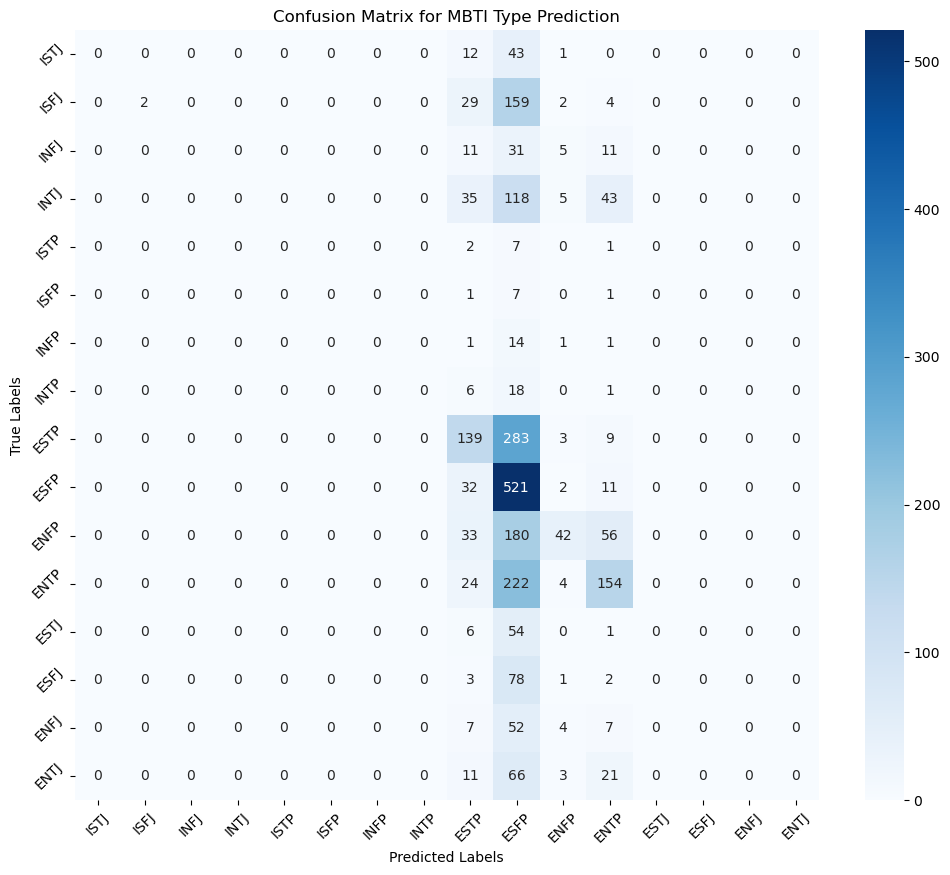

In [75]:
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(conf_matrix_RF, annot=True, fmt="d", cmap="Blues", xticklabels=mbti_types, yticklabels=mbti_types)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MBTI Type Prediction')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.yticks(rotation=45)
plt.show()

Evaluation: 
- ESFP, ESTP, and ENTP all have high diagnal values. This means the model relatively effectively recognizes 'ESFP, ESTP, and ENTP' personality types from their posts. Among these three types, ESFP has the highest diagnal value, representing that the model can be mostly effectivelly predict this personality type. However, the cells corresponding to the true label 'ISFJ', 'ESTP','ENFP','ENTP' and predicted label 'ESFP' have high counts, it suggests the model often mistakes 'ESTP','ENFP','ENTP' posts for 'ESFP'. It is interesting that the model is very easy to wrongly predict other personality type to 'ESFP'. 

Using the best performance model in linear model

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
l1_clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=2.5).fit(X_train_vectorized, y_train)
l1_clf.score(X_test_vectorized, y_test)

0.5224740683826354

Confusion Matrix for LR

In [78]:
y_pred_LR = l1_clf.predict(X_test_vectorized)

In [79]:
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)

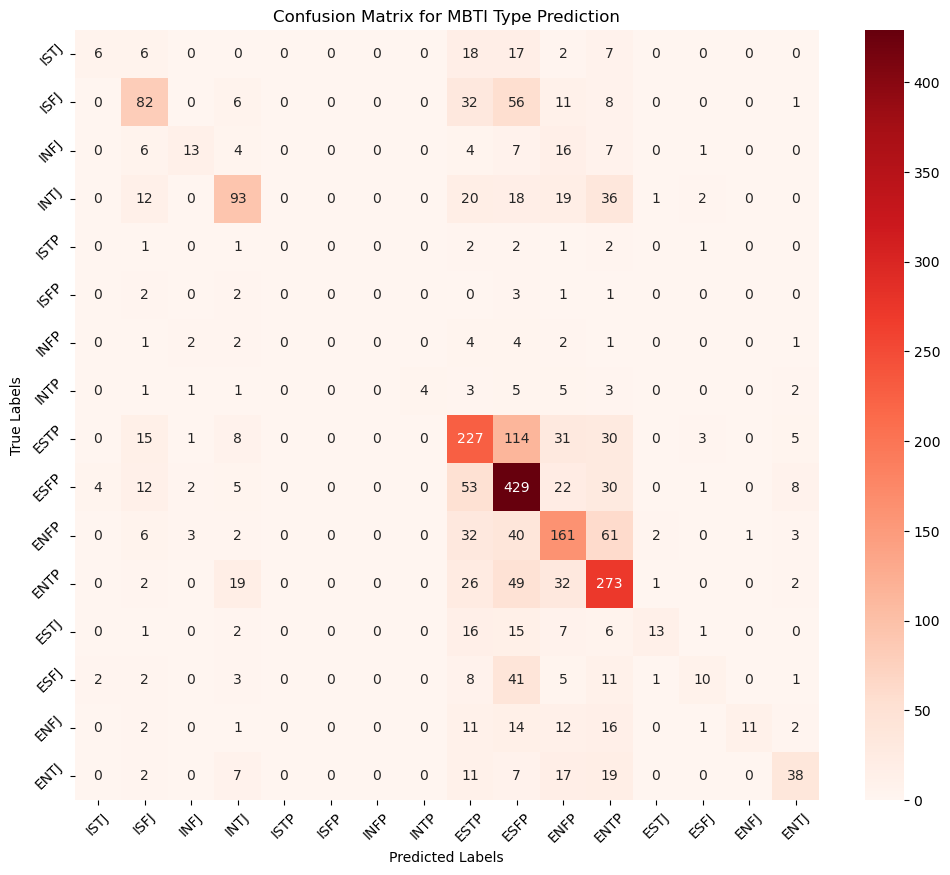

In [80]:
mbti_types = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP',
              'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']

plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(conf_matrix_LR, annot=True, fmt="d", cmap="Reds", xticklabels=mbti_types, yticklabels=mbti_types)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MBTI Type Prediction')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.yticks(rotation=45)
plt.show()

Evaluation:
- From this heatmap, we can see that the diagonal values are more, representing the model performance is better then random forest model. Similar to the random forest model, logistic regression model also mistakes 'ESTP' as 'ESFP', but it's much less 116 Vs. 230. 
- ISFJ, INFJ, ESFP, ESTP, ENFP,  and ENTP all have relatively high diagnal values. This means the model relatively effectively recognizes 'ESFP, ESTP, and ENTP' personality types from their posts. ESFP still have the highest correct prediction. But, the amount of 'correct hit' decreases compare to random forest model (467 -- 445).

<font color='lightblue'> <h2>Classification Report</h2> </font>

Report for random forest model:

In [81]:
print(classification_report(y_test, y_pred_RF, target_names=mbti_types, zero_division=0))

              precision    recall  f1-score   support

        ISTJ       0.00      0.00      0.00        56
        ISFJ       1.00      0.01      0.02       196
        INFJ       0.00      0.00      0.00        58
        INTJ       0.00      0.00      0.00       201
        ISTP       0.00      0.00      0.00        10
        ISFP       0.00      0.00      0.00         9
        INFP       0.00      0.00      0.00        17
        INTP       0.00      0.00      0.00        25
        ESTP       0.39      0.32      0.35       434
        ESFP       0.28      0.92      0.43       566
        ENFP       0.58      0.14      0.22       311
        ENTP       0.48      0.38      0.42       404
        ESTJ       0.00      0.00      0.00        61
        ESFJ       0.00      0.00      0.00        84
        ENFJ       0.00      0.00      0.00        70
        ENTJ       0.00      0.00      0.00       101

    accuracy                           0.33      2603
   macro avg       0.17   

Report for logistic regression model:

In [82]:
print(classification_report(y_test, y_pred_LR, target_names=mbti_types, zero_division=0))

              precision    recall  f1-score   support

        ISTJ       0.50      0.11      0.18        56
        ISFJ       0.54      0.42      0.47       196
        INFJ       0.59      0.22      0.32        58
        INTJ       0.60      0.46      0.52       201
        ISTP       0.00      0.00      0.00        10
        ISFP       0.00      0.00      0.00         9
        INFP       0.00      0.00      0.00        17
        INTP       1.00      0.16      0.28        25
        ESTP       0.49      0.52      0.50       434
        ESFP       0.52      0.76      0.62       566
        ENFP       0.47      0.52      0.49       311
        ENTP       0.53      0.68      0.60       404
        ESTJ       0.72      0.21      0.33        61
        ESFJ       0.50      0.12      0.19        84
        ENFJ       0.92      0.16      0.27        70
        ENTJ       0.60      0.38      0.46       101

    accuracy                           0.52      2603
   macro avg       0.50   

Evaluation:
 - For RF:
    - Precision: Most types have very low precision, with many types having a precision of 0.00, indicating the model did not correctly predict any instances of these types. Types like ISFJ (0.57) and ISTJ (0.67) have higher precision, meaning these predictions were more often correct.
    - Recall: Recall is also very low for most types, especially for types like ISTP, ISFP, INTP, and INFP, where it's 0.00, indicating the model failed to identify most of the true instances of these types. ESFP has a high recall (0.83), indicating the model was able to identify a large proportion of the actual ESFP instances.
    - f1-score: The F1-scores are also low for most types, reflecting the poor performance in precision and recall. The ESFP type has the highest F1-score (0.44), indicating a relatively better balance between precision and recall for this type. However, overall, the low F1-scores indicate the model is not performing well in balancing precision and recall across most MBTI types.
    - Same output can be showned in the accuracy, macro avg, and weighted avg.

 - For LR: （with comparison)
    - This model shows an improvement in precision, recall, and F1-score for many MBTI types compared to RF report. Notable improvements can be seen in classes like ISFJ, INTJ, ESTP, ESFP, ENFP, and ENTP. It also shows non-zero scores for many of these previously underperforming classes, such as ISFJ, INFJ, and ISFP. This suggests enhancements in the model's ability to correctly identify and classify these MBTI types.
    - LR report still shows some classes with very low or zero scores (ISTP, ISFP, INFP), similar to RF report, indicating persistent difficulty in correctly predicting these types. However, some classes (ESFP, ENTP) now have relatively high F1-scores, showing particular strength in these areas.
    - Both reports show a disparity between macro and weighted averages, but the gap narrows in LR report, particularly for the F1-score. This suggests that while there are still performance discrepancies across classes, the model has become more balanced in its ability to handle different MBTI types.

<font color='lightblue'> <h2>Hyper-Parameter Tuning (gridsearchcv)</h2> </font>

In [83]:
from sklearn.model_selection import GridSearchCV

HPT for random forest model

In [84]:
rf = RandomForestClassifier(random_state=42, n_estimators=1000)
Parameters_RF = {'max_depth': [10, 20, None],
                 'criterion': ['gini', 'entropy']}
grid_rf = GridSearchCV(rf, Parameters_RF, cv=None)
grid_rf.fit(X_train_vectorized, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None]})

In [101]:
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': None}

In [102]:
grid_rf.best_score_

0.33596897648151536

HPT for logistic regression model

In [87]:
lr = LogisticRegression(random_state=0)
Parameters_LR = {'penalty':('l1', 'l2'), 
              'C':[1.0, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
              'solver': ['liblinear']}
grid_cv = GridSearchCV(estimator = lr, param_grid = Parameters_LR, cv=None) 
grid_cv.fit(X_train_vectorized, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1.0, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                               5.0],
                         'penalty': ('l1', 'l2'), 'solver': ['liblinear']})

In [98]:
grid_cv.best_params_

{'C': 2.5, 'penalty': 'l1', 'solver': 'liblinear'}

In [99]:
grid_cv.best_score_

0.5118584958746043

In [90]:
l1_clf7 = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.8).fit(X_train_vectorized, y_train)
l1_clf7.score(X_test_vectorized, y_test)

0.5209373799462159

<font color='lightblue'> <h2>KFold Cross Validation</h2> </font>

In [91]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score

In [92]:
rf_best = RandomForestClassifier(random_state=42, criterion='gini', n_estimators=100, max_depth=None)
lr_best = LogisticRegression(random_state=0, C = 2.5, penalty = 'l1', solver = 'liblinear')

In [93]:
kf = KFold(n_splits=5, shuffle=True, random_state=None)

For random forest model:

In [105]:
recall_scorer = make_scorer(recall_score, average='micro')
scores_rf = cross_val_score(rf_best, X_train_vectorized, y_train, cv=kf, scoring=recall_scorer)
scores_rf

array([0.32016461, 0.28971193, 0.32372323, 0.31136738, 0.30313015])

For logistic regression model:

In [106]:
recall_scorer = make_scorer(recall_score, average='micro')
scores_lr = cross_val_score(lr_best, X_train_vectorized, y_train, cv=kf, scoring=recall_scorer)
scores_lr


array([0.51851852, 0.50123457, 0.4892916 , 0.51482702, 0.50411862])

The recores represent the how much percentage of all relevant instances across all classes in the fold. We can see that the logistic regression model has better performance for every fold. It ranges from 0.486 to 0.522 with an average 0.505. 